<a href="https://colab.research.google.com/github/almostoutlier/Projects/blob/main/Flights_Delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Delay Prediction using Machine Learning Techniques

**Data Source:** https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv

* This dataset contains information about flights in three modules; Airlines, Airports and Flights.
* All the required data is present in "Flights" module. This includes flight details, departure and arrival airports, flight delays, cancellations and reasons for the same.
* Using this data we will predict the status of the flight and the corresponding reason.

**Objectives:**
1. If a flight will be on time/ delayed/ cancelled? (Classification Model)
2. If the Flight is being delayed, what could be the reason for it? (Classification Model)
3. If the Flight is being canceled, what could be the reason for it? (Classification Model)
4. If the flight is being delayed, by how many minutes it is going to get delayed? (Regression Model)

The project will will be executed in the following steps:
1. Data Exploration
2. Data Cleaning
3. Data Processing
4. Feature Selection
5. Exploratory Data Analysis of Preprocessed Data
    
    5.1. Delayed vs. Cancelled (Multiclass Classification)

    5.2. Reason for Flight Delay (Multilabel Classification)
    
    5.3. Flight Delay Prediction in Minutes (Regression Analysis)
6. Model Training

    6.1. Delayed vs. Cancelled (Multiclass Classification) Model Training

    6.2. Reason for Flight Delay (Multilabel Classification) Model Training
    
    6.3. Flight Delay Prediction in Minutes (Regression Analysis) Model Training
7. Model Evaluation
8. Model Prediction
9. Conclusion


# **Importing Neccessary Libraries**

* visualization: matplolib, seaborn
* data manipulation: pandas, numpy
* modeling: sklearn
* class definition: regression, figures

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#Multi label algorithm
from sklearn.multioutput import MultiOutputClassifier

#Stats Model Libraries
from statsmodels.formula.api import ols
import statsmodels.api as sm

#algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score, hamming_loss, multilabel_confusion_matrix, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **1. Data Exploration**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
airlines = pd.read_csv("/content/drive/MyDrive/Flights/airlines.csv")
airlines.head(14)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


**Data Description**
1. **IATA_Code:** Airline Identifier
2. **Airline:** Name of the Airline

In [ ]:
airports = pd.read_csv("/content/drive/MyDrive/Flights/airports.csv")
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


**Data Description**
1. **IATA_Code:** Location Identifier
2. **Airport:** Airport Name
3. **City:** City in which airport is located
4. **State:** State in which airport is located
5. **Country:** Country in which Airport is located
6. **Latitude:** Latitude of the Airport
7. **Longitude:** longitude of the Airport

In [ ]:
flights = pd.read_csv("/content/drive/MyDrive/Flights/flights.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Data Description**

1. **Year:** Year of the flight trip
2. **Month:** month of the flight trip
3. **Day:** Day of the flight trip
4. **Day of the flight trip:** Day of week of the flight trip
5. **Airline:** Airline Identifier
6. **Flight_Number:** Flight Identifier
7. **Tail_Number:** Aircraft Identifier
8. **Origin_Airport:** Starting Airport
9. **Destination_Airport:** Landing Airport
10. **Scheduled_Departure:** Time at which aircraft is supposed to depart.
11. **Departure_Time:** Time at which it actually departed.
12. **Departure_Delay:** Total delay in departure
13. **Taxi_Out:** The time duration elapsed between departure from the origin airport gate and wheels off
14. **Wheel_Off:** The time point that the aircraft's wheels leave the ground
15. **Scheduled_Time:** Planned time amount needed for the flight trip
16. **Elasped_Time:** Air_Time+Taxi_In+Taxi_Out
17. **Air_Time:** The time duration between wheels_off and wheels_on time
18. **Distance:** Distance between two airports
19. **Wheels_On:** The time point that the aircraft's wheels touch on the ground
20. **Taxi_In:** The time duration elapsed between wheels-on and gate arrival at the destination airport
21. **Scheduled_Arrival:** Planned arrival time
22. **Arrival_Time:** Wheels_On+Taxi_In
23. **Arrival_Delay:** Arrival_TIime - Schedules_Arrival
24. **Diverted:** Aircraft landed on airport that out of schedule
25. **Canceled:** Flight Canceled (1 = canceled)
26. **Cancellation_Reason:** Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
27. **Air_System_Delay:** Delay caused by air system
28. **Security_Delay:** Delay caused by security
29. **Airline_Delay:** Delay caused by the airline
30. **Late_Aircraft_Delay:** Delay caused by aircraft
31. **Weather_Delay:** Delay caused by weather





















In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [ ]:
flights.isnull()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
5819077,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [ ]:
#checking unique values in each column
flights.nunique()

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64


**Observations:**
*   There is only one value in the year column and can be dropped.
*   Tail Number can be dropped as it won't add any value to the data.



In [ ]:
num_cols= ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
cat_cols=['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON']

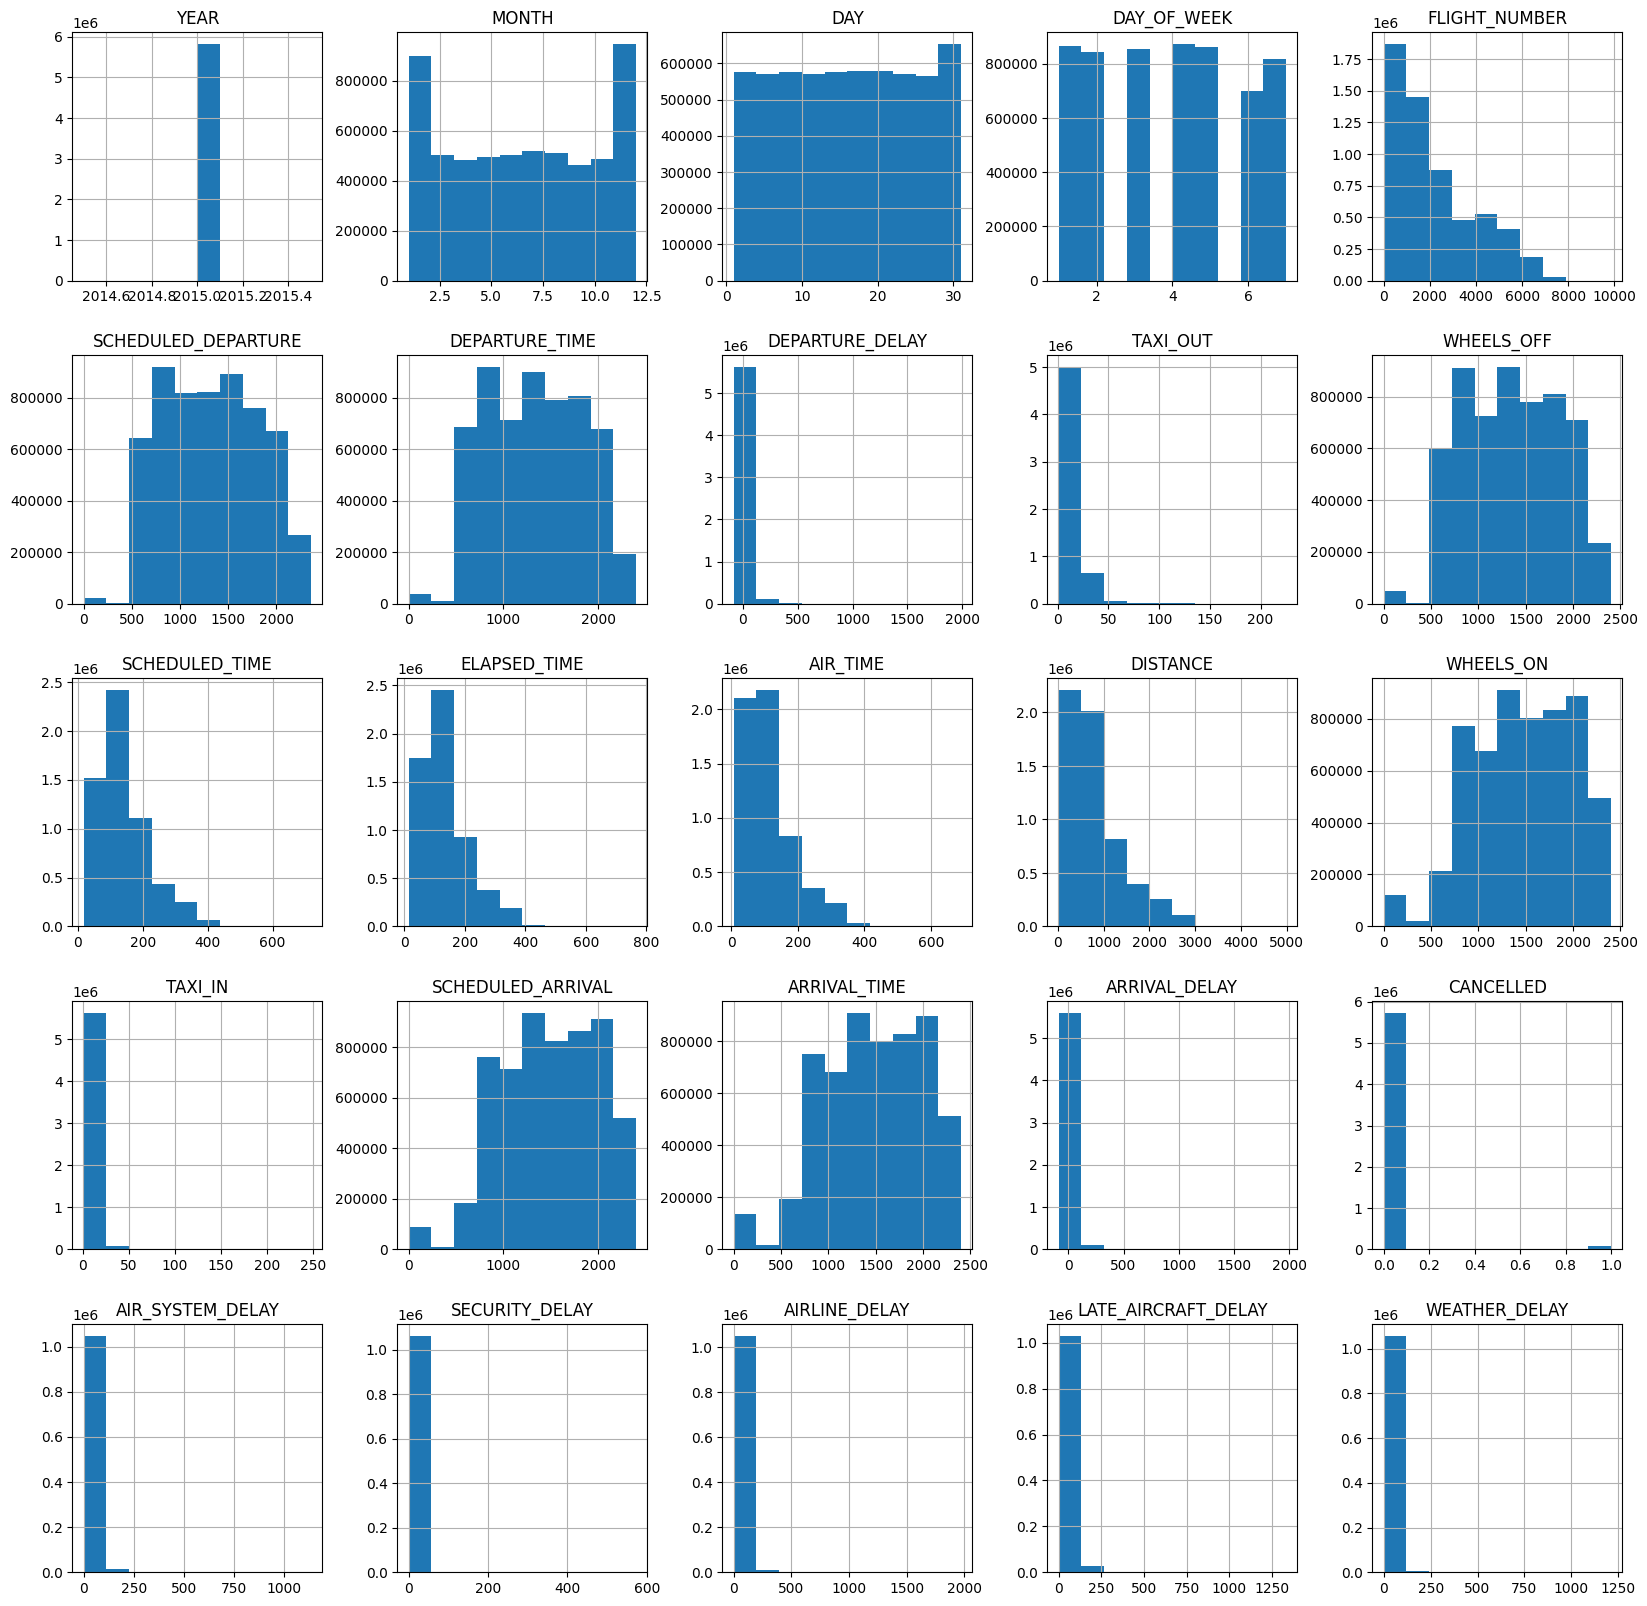

In [ ]:
flights[num_cols].hist(figsize=(20,20))
plt.show()

**Observations:**
* Scheduled_Time, Elapsed_Time, Air_Time, Distance, Taxi_In, Arrival_Delay, Cancelled, Air_System_Delay, Security_Delay, Airine_Delay, Late_Aircraft_Delay, Weather_Delay, Departure_Delay, Taxi_Out are the variables that are right positive skewed in the datset.

* There are many delays in the begining of 2015 year and the delays are spread throughout the month of the year. There are more delays in the even days of the week than the odd days of the week.

* Air_System_Delay, Security_Delay, Airine_Delay, Late_Aircraft_Delay, Weather_Delay are mostly below 250 minutes for all the flights.



In [ ]:
flights[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.524085,3.405137,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.704594,8.783425,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.092742,1757.063999,1.0,730.0,1690.0,3230.0,9855.0
SCHEDULED_DEPARTURE,5819079.0,1329.602470,483.751821,1.0,917.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5732926.0,1335.204439,496.423260,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.071662,8.895574,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5730032.0,1357.170841,498.009356,1.0,935.0,1343.0,1754.0,2400.0


**Observations:**
* Departure_delay is 9.3 minutes on an average  with high standard deviation. Taxi_In time is low as there is less delay between wheels on and arrival time at the arrival airport. There are a few outliers in Taxi_In time such as the maximum delay of 248 minutes.

In [ ]:
for i in cat_cols:
    print(flights[i].value_counts(normalize=True))
    print('*'*40)

AIRLINE
WN    0.216848
DL    0.150519
AA    0.124759
OO    0.101108
EV    0.098293
UA    0.088626
MQ    0.050632
B6    0.045892
US    0.034149
AS    0.029647
NK    0.020171
F9    0.015610
HA    0.013107
VX    0.010638
Name: proportion, dtype: float64
****************************************
TAIL_NUMBER
N480HA    6.491674e-04
N488HA    6.414146e-04
N484HA    6.414146e-04
N493HA    6.176394e-04
N478HA    6.162611e-04
              ...     
N175UA    1.722843e-07
N852NW    1.722843e-07
N7LBAA    1.722843e-07
N7LEAA    1.722843e-07
N180UA    1.722843e-07
Name: proportion, Length: 4897, dtype: float64
****************************************
ORIGIN_AIRPORT
ATL      5.960325e-02
ORD      4.912874e-02
DFW      4.116648e-02
DEN      3.369176e-02
LAX      3.345426e-02
             ...     
11503    1.718485e-07
14222    1.718485e-07
13964    1.718485e-07
13459    1.718485e-07
12265    1.718485e-07
Name: proportion, Length: 930, dtype: float64
****************************************
DESTINATION

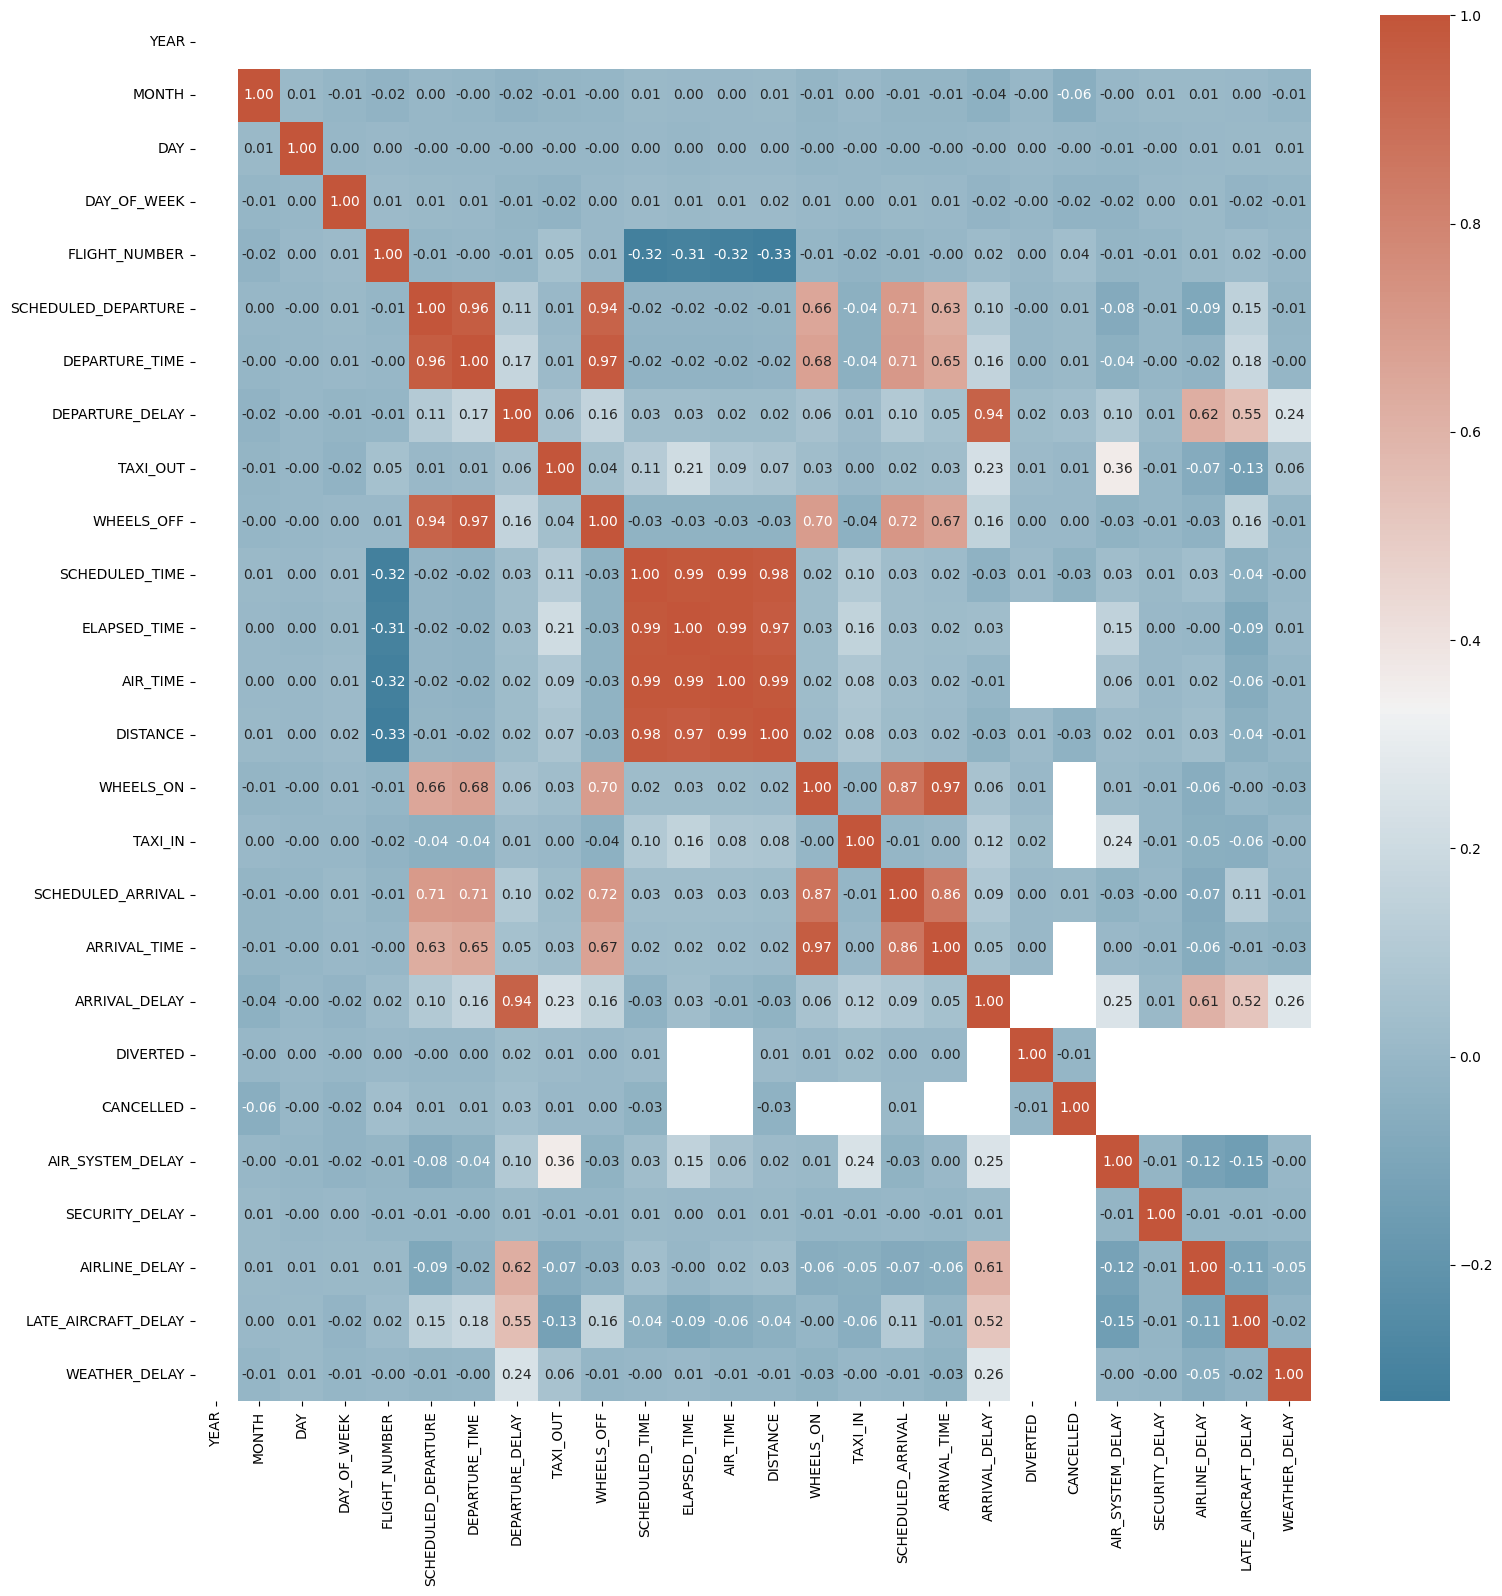

In [ ]:
plt.figure(figsize=(18,18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(flights.corr(numeric_only=True))

# Create a visual view of the pairwise correlations
sns.heatmap(flights.corr(numeric_only=True),annot=True,fmt='.2f',cmap=cmap)
plt.show()

**Observations:**
* From the correlation matrix, Scheduled_Departure, Departure_Time are oddly highly correlated with Wheels_Off with 94% positive correlation.
* Parallely, Scheduled_Time, Elapsed_Time, Air_Time and Distance are highly positively correlated showing they are infuential in the flight delays.

In [ ]:
needed_num_cols= ['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'AIR_TIME', 'ARRIVAL_DELAY', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','DIVERTED']
needed_cat_cols=['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON']
df=flights[needed_num_cols + needed_cat_cols]

# **2. Data Cleaning**

In [ ]:
df = df[df['DIVERTED'] == 0]
df=df.drop('DIVERTED', axis=1)
df.head()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,AIR_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
0,1,1,4,98,5,169.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,AS,ANC,SEA,NaN
1,1,1,4,2336,10,263.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,AA,LAX,PBI,NaN
2,1,1,4,840,20,266.0,5.0,0,NaN,NaN,NaN,NaN,NaN,US,SFO,CLT,NaN
3,1,1,4,258,20,258.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,AA,LAX,MIA,NaN
4,1,1,4,135,25,199.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,AS,SEA,ANC,NaN




*   15187 entries with flights diverted are droped from the dataset as they are not of our interest.
*   "DIVERTED' column is also dropped from the dataset.
*   The total number of rows after removing these entries are 5,803,892.



# **3. Data Preprocessing**

In [ ]:
df["CANCELLATION_REASON"].fillna("NC", inplace = True)
df["AIR_SYSTEM_DELAY"].fillna(0, inplace = True)
df["SECURITY_DELAY"].fillna(0, inplace = True)
df["AIRLINE_DELAY"].fillna(0, inplace = True)
df["LATE_AIRCRAFT_DELAY"].fillna(0, inplace = True)
df["WEATHER_DELAY"].fillna(0, inplace = True)
df.head()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,AIR_TIME,ARRIVAL_DELAY,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
0,1,1,4,98,5,169.0,-22.0,0,0.0,0.0,0.0,0.0,0.0,AS,ANC,SEA,NC
1,1,1,4,2336,10,263.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,AA,LAX,PBI,NC
2,1,1,4,840,20,266.0,5.0,0,0.0,0.0,0.0,0.0,0.0,US,SFO,CLT,NC
3,1,1,4,258,20,258.0,-9.0,0,0.0,0.0,0.0,0.0,0.0,AA,LAX,MIA,NC
4,1,1,4,135,25,199.0,-21.0,0,0.0,0.0,0.0,0.0,0.0,AS,SEA,ANC,NC


In [ ]:
df[df.columns[df.isnull().any()]].isnull().sum()

AIR_TIME         89884
ARRIVAL_DELAY    89884
dtype: int64

**Observations:**
* 89884 rows of nulll values in AIR_TIME and ARRIVAL_DELAY are due to the cancelled flight. Thus, these values are replaced by 0's

In [ ]:
df["AIR_TIME"].fillna(0, inplace = True)
df["ARRIVAL_DELAY"].fillna(0, inplace = True)

In [ ]:
conditions = [
    (df['ARRIVAL_DELAY'] >= 15),
    (df['CANCELLED'] == 0),
    (df['CANCELLED'] == 1)
    ]

# create a list of the values we want to assign for each condition
values = ['D', 'N', 'C']

df=df.drop('CANCELLED', axis=1)
needed_num_cols.remove("CANCELLED")

# create a new column and use np.select to assign values to it using our lists as arguments
df['FLIGHT_STATUS'] = np.select(conditions, values)
needed_cat_cols.append('FLIGHT_STATUS')

# display updated DataFrame
df.head()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,AIR_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON,FLIGHT_STATUS
0,1,1,4,98,5,169.0,-22.0,0.0,0.0,0.0,0.0,0.0,AS,ANC,SEA,NC,N
1,1,1,4,2336,10,263.0,-9.0,0.0,0.0,0.0,0.0,0.0,AA,LAX,PBI,NC,N
2,1,1,4,840,20,266.0,5.0,0.0,0.0,0.0,0.0,0.0,US,SFO,CLT,NC,N
3,1,1,4,258,20,258.0,-9.0,0.0,0.0,0.0,0.0,0.0,AA,LAX,MIA,NC,N
4,1,1,4,135,25,199.0,-21.0,0.0,0.0,0.0,0.0,0.0,AS,SEA,ANC,NC,N


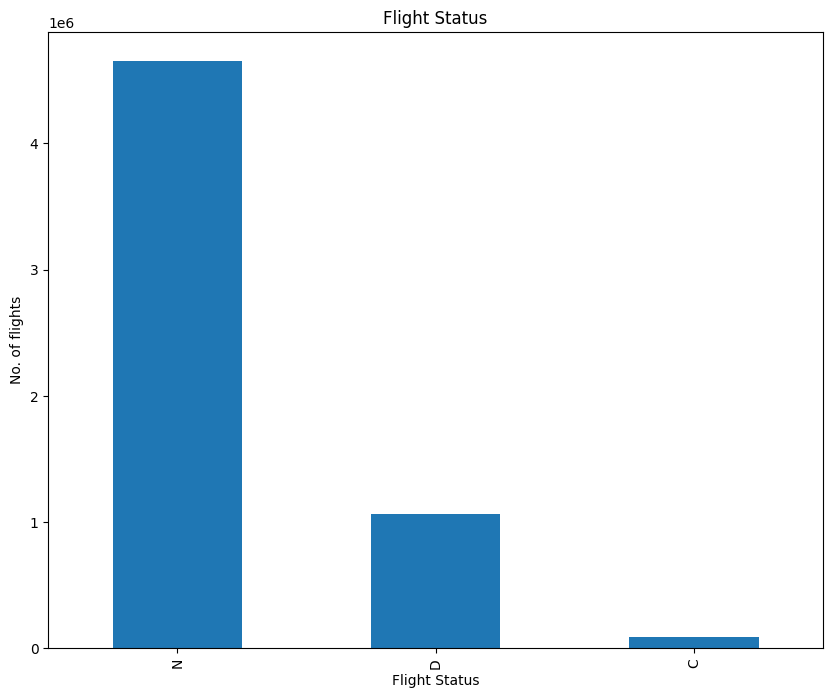

In [ ]:
df['FLIGHT_STATUS'].value_counts().plot(kind='bar',figsize=(10,8))

plt.xlabel("Flight Status")
plt.ylabel("No. of flights")
plt.title("Flight Status")
plt.show()

**Observations:**
* There are three flight delay statuses. Flight having the status of delayed are significant compared to the other two.
* Flight which are cancelled comprise of very less proportion in the dataset.

In [ ]:
df['AIR_SYSTEM_DELAY'] = np.where(df['AIR_SYSTEM_DELAY'] > 0, 1, 0)
df['SECURITY_DELAY'] = np.where(df['SECURITY_DELAY'] > 0 , 1, 0)
df['AIRLINE_DELAY'] = np.where(df['AIRLINE_DELAY'] > 0, 1, 0)
df['LATE_AIRCRAFT_DELAY'] = np.where(df['LATE_AIRCRAFT_DELAY'] > 0, 1, 0)
df['WEATHER_DELAY'] = np.where(df['WEATHER_DELAY'] > 0, 1, 0)

# display updated DataFrame
df.head()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,AIR_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON,FLIGHT_STATUS
0,1,1,4,98,5,169.0,-22.0,0,0,0,0,0,AS,ANC,SEA,NC,N
1,1,1,4,2336,10,263.0,-9.0,0,0,0,0,0,AA,LAX,PBI,NC,N
2,1,1,4,840,20,266.0,5.0,0,0,0,0,0,US,SFO,CLT,NC,N
3,1,1,4,258,20,258.0,-9.0,0,0,0,0,0,AA,LAX,MIA,NC,N
4,1,1,4,135,25,199.0,-21.0,0,0,0,0,0,AS,SEA,ANC,NC,N


* All the delay reason columns having values greater than one are replaced by 1's and null values are replaced by 0's to signify the reason for delay.

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0             90.27           99.94          90.18                 90.4   
1              9.73            0.06           9.82                  9.6   

   WEATHER_DELAY  
0          98.88  
1           1.12  


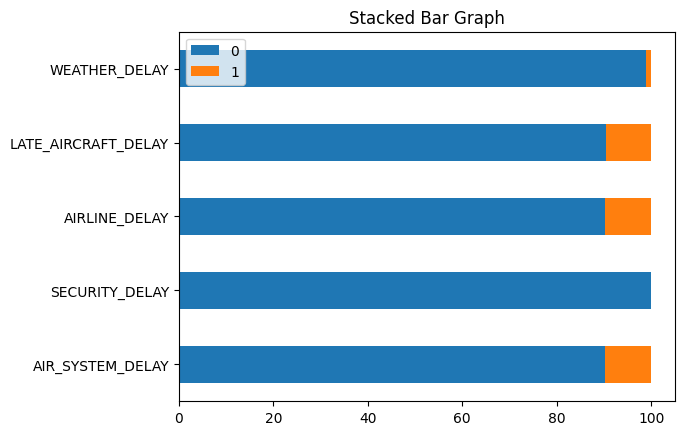

In [ ]:
t=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
tmp=df[t]

tmp = tmp.apply(lambda x: (x.value_counts(normalize=True) * 100).round(2))

print(tmp)
tmp = pd.concat([tmp[col] for col in tmp.columns], axis=1)
tmp=tmp.transpose()

# Plotting all columns in a single plot
tmp.plot(kind='barh', stacked=True, title='Stacked Bar Graph')

# Display the plot
plt.show()

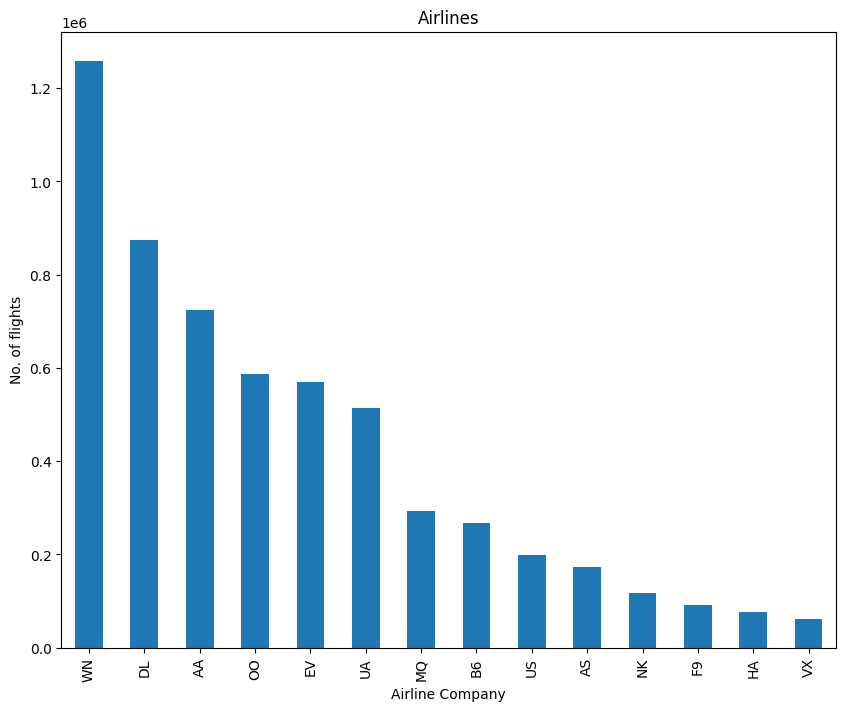

In [ ]:
df['AIRLINE'].value_counts().plot(kind='bar',figsize=(10,8))

plt.xlabel("Airline Company")
plt.ylabel("No. of flights")
plt.title("Airlines")
plt.show()

**Observations:**
* The bar graph plots the number of flights each airline company owns. SouthWest Airlines, Delta Airlines have most functioning aircrafts. Hawaian Airlines, Virgin American Airlines have least flights in the dataset.

CANCELLATION_REASON
B    0.008417
A    0.004353
C    0.002714
D    0.000004
Name: proportion, dtype: float64


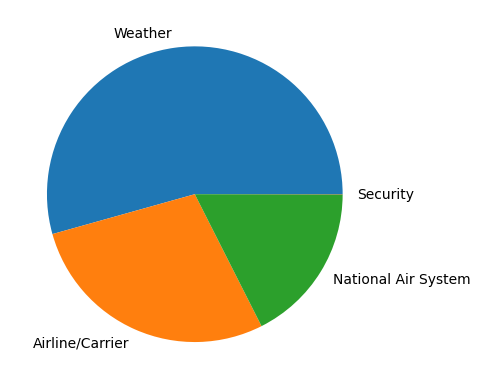

In [ ]:
tmp=df['CANCELLATION_REASON'].value_counts(normalize=True)
tmp=tmp.drop('NC')
l=["Weather", "Airline/Carrier", "National Air System", "Security"]
print(tmp)
plt.pie(tmp, labels=l)
plt.show()



**Observations:**


*   There are 5819079 observations and 31 columns in the dataframe.
*   There fours reasons for a flight that is being cancelled.
      * A - Airline/ carrier
      * B - Weather
      * C - National Air System
      * D - Security
*   Entries with arrival delay of 14 or less minutes do not have any particular reason for delay.
*   All of the null values in "CANCELLATION_REASON" are replaced with "NC"
*   All of the null values in "AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY" are replaced by 0's.






**Observations:**
* Athough cancellations happen rarely, Weather is a major reason for flight cancellations followed by Airline/Carrier, National Air System and Security.

In [ ]:
df[df['MONTH']==10].head(50)

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,AIR_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON,FLIGHT_STATUS
4385712,10,1,4,1230,5,189.0,-19.0,0,0,0,0,0,AA,14747,11298,NC,N
4385713,10,1,4,1805,5,171.0,-10.0,0,0,0,0,0,DL,14771,13487,NC,N
4385714,10,1,4,612,5,149.0,-14.0,0,0,0,0,0,NK,12889,13487,NC,N
4385715,10,1,4,260,10,271.0,7.0,0,0,0,0,0,AA,12892,13303,NC,N
4385716,10,1,4,1982,10,257.0,-11.0,0,0,0,0,0,AA,14771,11057,NC,N
4385717,10,1,4,684,14,212.0,-33.0,0,0,0,0,0,UA,14771,13930,NC,N
4385718,10,1,4,1171,14,205.0,-13.0,0,0,0,0,0,UA,12892,13930,NC,N
4385719,10,1,4,448,15,208.0,-5.0,0,0,0,0,0,AA,14869,11057,NC,N
4385720,10,1,4,2406,15,147.0,-1.0,0,0,0,0,0,AA,12892,11298,NC,N
4385721,10,1,4,1617,20,178.0,-7.0,0,0,0,0,0,DL,12892,13487,NC,N


In [ ]:
filter1 = df["DESTINATION_AIRPORT"].isin(airports['IATA_CODE'])
filter2 = df["ORIGIN_AIRPORT"].isin(airports['IATA_CODE'])

# displaying data with both filter applied and mandatory
temp_df=df[filter1 & filter2]
temp_df.nunique()
temp_df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318560 entries, 0 to 5819078
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   FLIGHT_NUMBER        int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   AIR_TIME             float64
 6   ARRIVAL_DELAY        float64
 7   AIR_SYSTEM_DELAY     int64  
 8   SECURITY_DELAY       int64  
 9   AIRLINE_DELAY        int64  
 10  LATE_AIRCRAFT_DELAY  int64  
 11  WEATHER_DELAY        int64  
 12  AIRLINE              object 
 13  ORIGIN_AIRPORT       object 
 14  DESTINATION_AIRPORT  object 
 15  CANCELLATION_REASON  object 
 16  FLIGHT_STATUS        object 
dtypes: float64(2), int64(10), object(5)
memory usage: 730.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 5803892 entries, 0 to 5819078
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   

*In the above info output, we have number of rows that calculate the difference between temp_df info and df info, it will give the no of rows with wrong destination and origin airport values*

In [ ]:
temp_df.nunique()

MONTH                    11
DAY                      31
DAY_OF_WEEK               7
FLIGHT_NUMBER          6952
SCHEDULED_DEPARTURE    1318
AIR_TIME                676
ARRIVAL_DELAY          1222
AIR_SYSTEM_DELAY          2
SECURITY_DELAY            2
AIRLINE_DELAY             2
LATE_AIRCRAFT_DELAY       2
WEATHER_DELAY             2
AIRLINE                  14
ORIGIN_AIRPORT          322
DESTINATION_AIRPORT     322
CANCELLATION_REASON       5
FLIGHT_STATUS             3
dtype: int64

In [ ]:
location_state=airports[['IATA_CODE', 'STATE']]
location_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  322 non-null    object
 1   STATE      322 non-null    object
dtypes: object(2)
memory usage: 5.2+ KB


*Mention that there are only 322 airports in our airports database*

In [ ]:
temp_df=temp_df.merge(location_state, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')
temp_df.rename(columns={'STATE': 'DESTINATION_STATE'}, inplace=True)
temp_df=temp_df.drop('IATA_CODE', axis=1)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318560 entries, 0 to 5318559
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   FLIGHT_NUMBER        int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   AIR_TIME             float64
 6   ARRIVAL_DELAY        float64
 7   AIR_SYSTEM_DELAY     int64  
 8   SECURITY_DELAY       int64  
 9   AIRLINE_DELAY        int64  
 10  LATE_AIRCRAFT_DELAY  int64  
 11  WEATHER_DELAY        int64  
 12  AIRLINE              object 
 13  ORIGIN_AIRPORT       object 
 14  DESTINATION_AIRPORT  object 
 15  CANCELLATION_REASON  object 
 16  FLIGHT_STATUS        object 
 17  DESTINATION_STATE    object 
dtypes: float64(2), int64(10), object(6)
memory usage: 730.4+ MB


*added destination state column according to airport*

In [ ]:
temp_df=temp_df.merge(location_state, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
temp_df.rename(columns={'STATE': 'ORIGIN_STATE'}, inplace=True)
temp_df=temp_df.drop('IATA_CODE', axis=1)
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318560 entries, 0 to 5318559
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   FLIGHT_NUMBER        int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   AIR_TIME             float64
 6   ARRIVAL_DELAY        float64
 7   AIR_SYSTEM_DELAY     int64  
 8   SECURITY_DELAY       int64  
 9   AIRLINE_DELAY        int64  
 10  LATE_AIRCRAFT_DELAY  int64  
 11  WEATHER_DELAY        int64  
 12  AIRLINE              object 
 13  ORIGIN_AIRPORT       object 
 14  DESTINATION_AIRPORT  object 
 15  CANCELLATION_REASON  object 
 16  FLIGHT_STATUS        object 
 17  DESTINATION_STATE    object 
 18  ORIGIN_STATE         object 
dtypes: float64(2), int64(10), object(7)
memory usage: 771.0+ MB


*added origin state column according to airport*

In [ ]:
temp_df.nunique()

MONTH                    11
DAY                      31
DAY_OF_WEEK               7
FLIGHT_NUMBER          6952
SCHEDULED_DEPARTURE    1318
AIR_TIME                676
ARRIVAL_DELAY          1222
AIR_SYSTEM_DELAY          2
SECURITY_DELAY            2
AIRLINE_DELAY             2
LATE_AIRCRAFT_DELAY       2
WEATHER_DELAY             2
AIRLINE                  14
ORIGIN_AIRPORT          322
DESTINATION_AIRPORT     322
CANCELLATION_REASON       5
FLIGHT_STATUS             3
DESTINATION_STATE        54
ORIGIN_STATE             54
dtype: int64

In [ ]:
temp_df[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DESTINATION_STATE', 'ORIGIN_STATE']].nunique()

ORIGIN_AIRPORT         322
DESTINATION_AIRPORT    322
DESTINATION_STATE       54
ORIGIN_STATE            54
dtype: int64

In [ ]:
West = ['WA','OR','MT','ID','WY','NV','CA','UT','CO','AZ','NM']
d1 = dict.fromkeys(West, 'West')

Midwest = ['ND','SD','NE','KS','MN','IA','MO','WI','MI','IL','IN','OH']
d2 = dict.fromkeys(Midwest, 'Midwest')

South = ['TX','OK','AR','LA','MS','TN','AL','GA','FL','SC','NC','KY','WV','VA','MD','DE']
d3 = dict.fromkeys(South, 'South')

Northeast = ['NY','NJ','PA','CT','MA','RI','NH','VT','ME']
d4 = dict.fromkeys(Northeast, 'Northeast')

Territories = ['HI','AK','PR','VI','GU','AS']
d5 = dict.fromkeys(Territories, 'Territories')

d = {**d1, **d2, **d3, **d4, **d5}

temp_df['DESTINATION_REGION']=temp_df['DESTINATION_STATE'].map(d)
temp_df['ORIGIN_REGION']=temp_df['ORIGIN_STATE'].map(d)

*mapping

In [ ]:
temp_df.nunique()

MONTH                    11
DAY                      31
DAY_OF_WEEK               7
FLIGHT_NUMBER          6952
SCHEDULED_DEPARTURE    1318
AIR_TIME                676
ARRIVAL_DELAY          1222
AIR_SYSTEM_DELAY          2
SECURITY_DELAY            2
AIRLINE_DELAY             2
LATE_AIRCRAFT_DELAY       2
WEATHER_DELAY             2
AIRLINE                  14
ORIGIN_AIRPORT          322
DESTINATION_AIRPORT     322
CANCELLATION_REASON       5
FLIGHT_STATUS             3
DESTINATION_STATE        54
ORIGIN_STATE             54
DESTINATION_REGION        5
ORIGIN_REGION             5
dtype: int64

In [ ]:
df= temp_df.drop(columns = ['DESTINATION_AIRPORT','DESTINATION_STATE','ORIGIN_AIRPORT','ORIGIN_STATE'])

# **4. Feature Selection**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318560 entries, 0 to 5318559
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   FLIGHT_NUMBER        int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   AIR_TIME             float64
 6   ARRIVAL_DELAY        float64
 7   AIR_SYSTEM_DELAY     int64  
 8   SECURITY_DELAY       int64  
 9   AIRLINE_DELAY        int64  
 10  LATE_AIRCRAFT_DELAY  int64  
 11  WEATHER_DELAY        int64  
 12  AIRLINE              object 
 13  CANCELLATION_REASON  object 
 14  FLIGHT_STATUS        object 
 15  DESTINATION_REGION   object 
 16  ORIGIN_REGION        object 
dtypes: float64(2), int64(10), object(5)
memory usage: 689.8+ MB


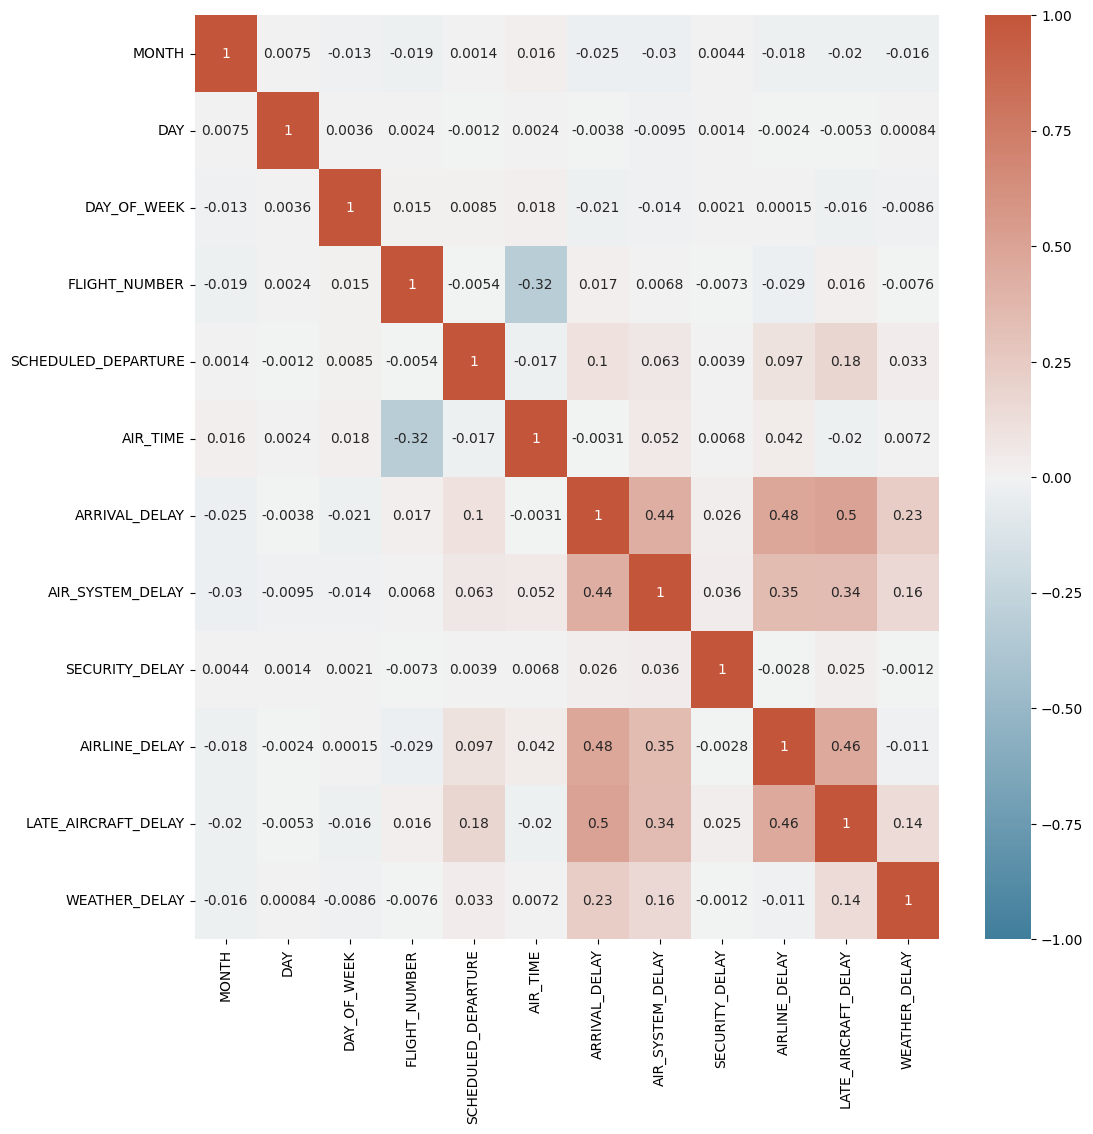

In [ ]:
df.info()
fig = plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True , cmap=cmap)
plt.show()

**Observations:**
* In the correlation matrix, Air_Time and Flight_Number are negatively correlated. The positively correlated variables such as Days, Month do not say much about the flights being delayed in this data.

In [ ]:
needed_num_cols= ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'AIR_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
needed_cat_cols=['AIRLINE', 'ORIGIN_REGION', 'DESTINATION_REGION', 'CANCELLATION_REASON', 'FLIGHT_STATUS']

In [ ]:
for i in needed_cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

AIRLINE
WN    0.216989
DL    0.150158
AA    0.121602
OO    0.101164
EV    0.098593
UA    0.088094
MQ    0.051119
B6    0.045962
US    0.037283
AS    0.029644
NK    0.020119
F9    0.015527
HA    0.013157
VX    0.010590
Name: proportion, dtype: float64
****************************************
ORIGIN_REGION
South          0.390150
West           0.284511
Midwest        0.181957
Northeast      0.113959
Territories    0.029424
Name: proportion, dtype: float64
****************************************
DESTINATION_REGION
South          0.390041
West           0.284574
Midwest        0.181977
Northeast      0.113973
Territories    0.029435
Name: proportion, dtype: float64
****************************************
CANCELLATION_REASON
NC    0.983561
B     0.009001
A     0.004571
C     0.002863
D     0.000004
Name: proportion, dtype: float64
****************************************
FLIGHT_STATUS
N    0.794909
D    0.188653
C    0.016439
Name: proportion, dtype: float64
*****************************

# **5. Exploratory Data Analysis of Preprocessed Data**

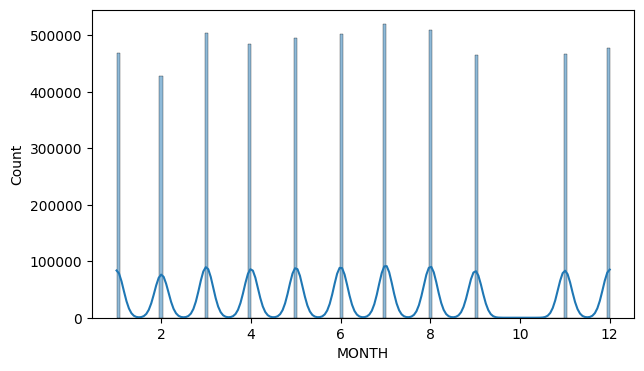

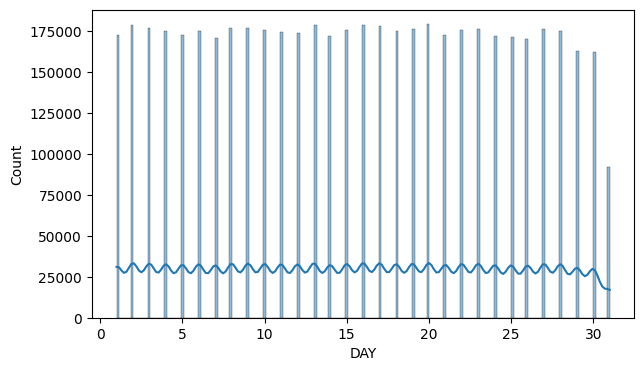

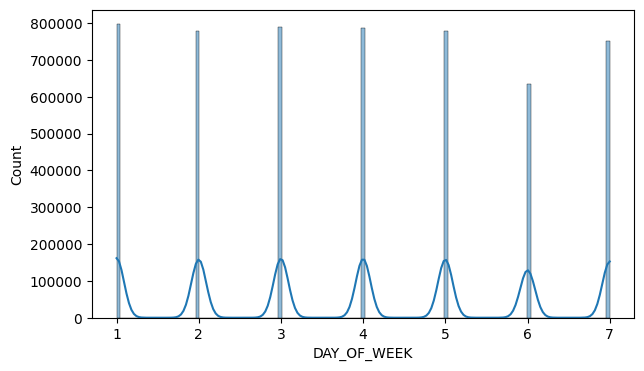

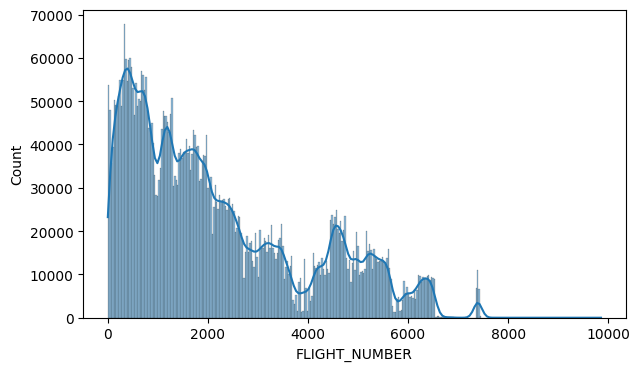

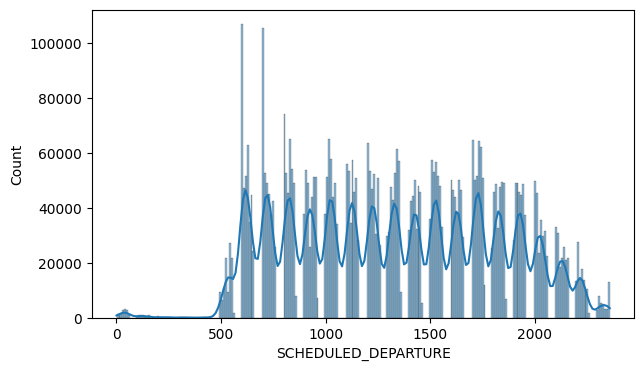

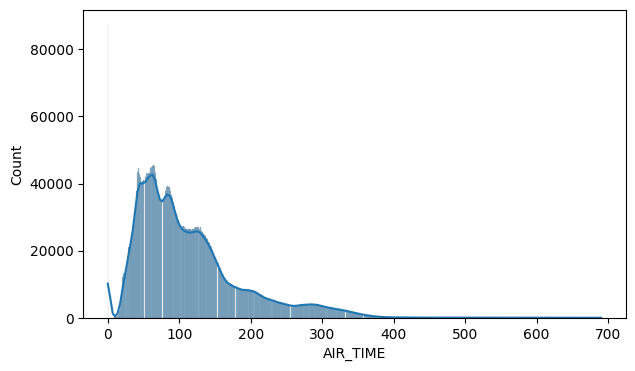

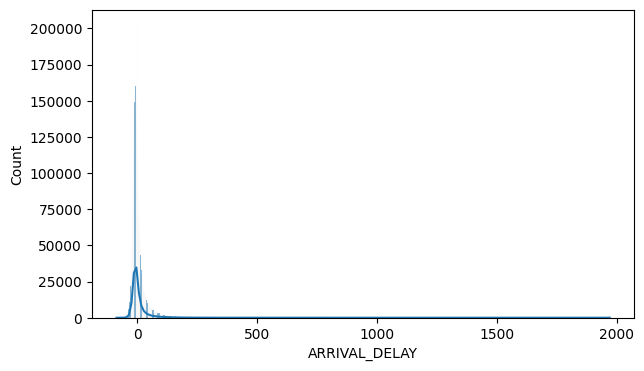

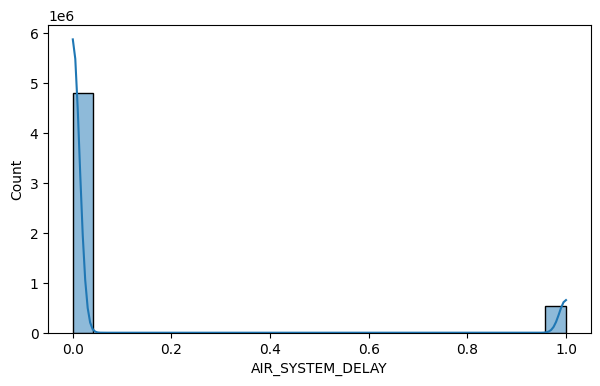

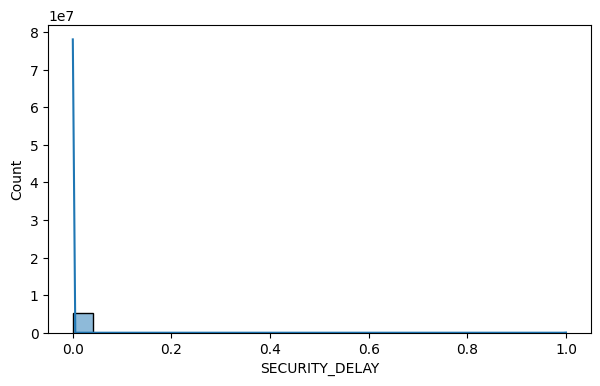

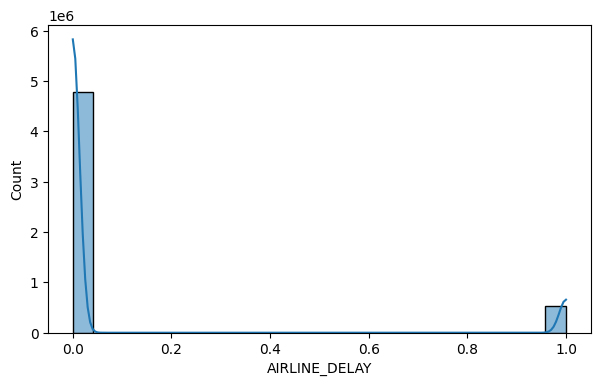

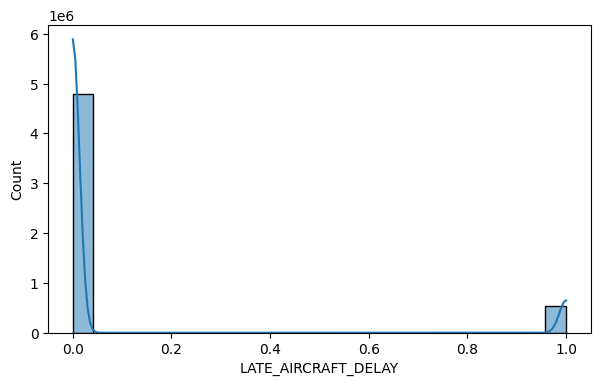

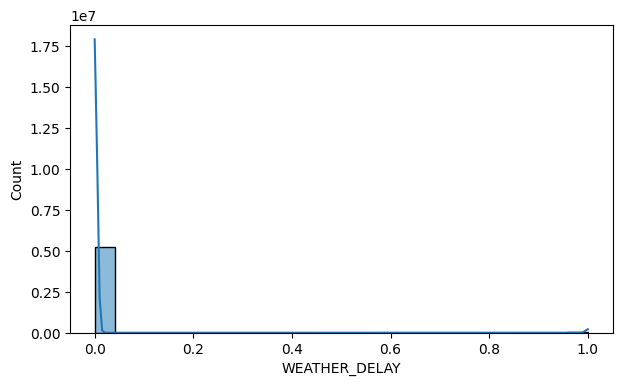

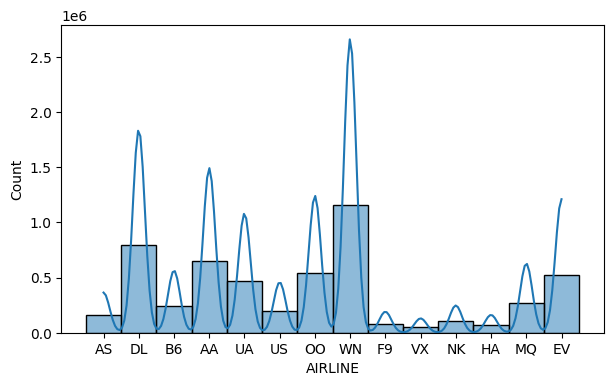

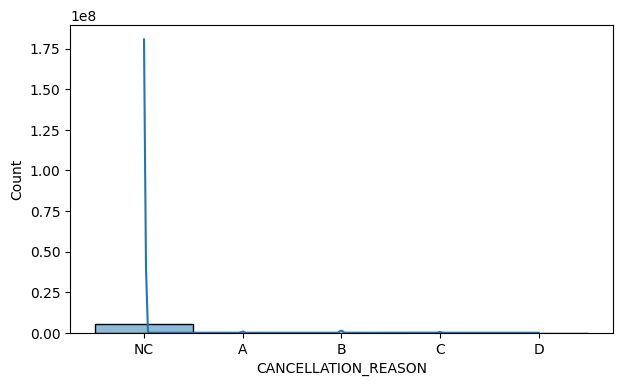

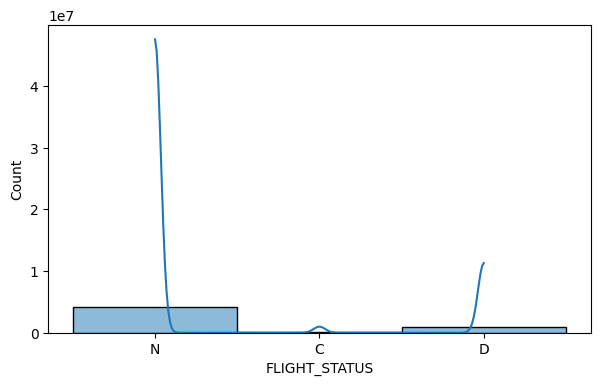

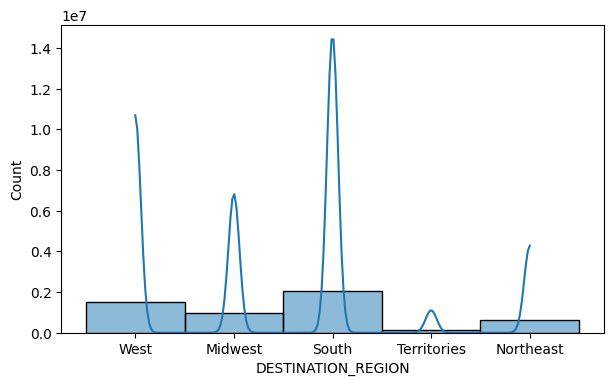

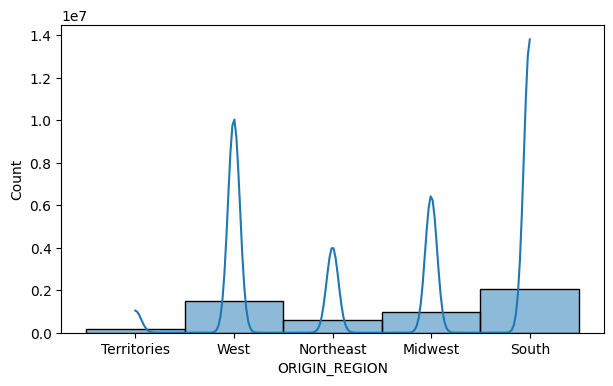

In [ ]:
for i in df.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df,x=i,kde=True)
  plt.show()

<Axes: xlabel='AIR_TIME'>

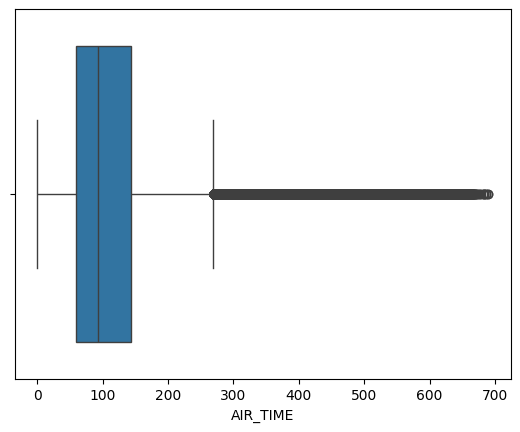

In [ ]:
sns.boxplot(x=df['AIR_TIME'])

<Axes: xlabel='ARRIVAL_DELAY'>

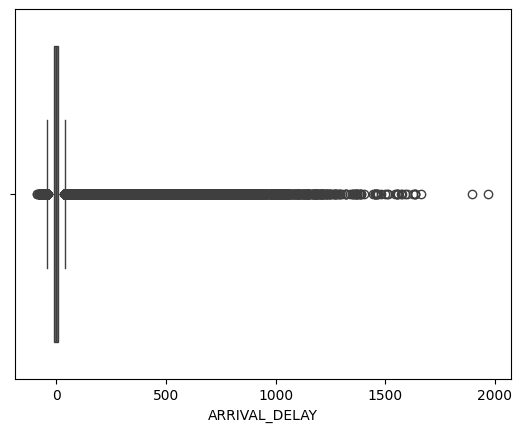

In [ ]:
sns.boxplot(x=df['ARRIVAL_DELAY'])

In [ ]:
df[['AIR_TIME', 'ARRIVAL_DELAY']].describe().T

,count,mean,std,min,25%,50%,75%,max
AIR_TIME,5318560.0,111.796882,73.143135,0.0,59.0,93.0,143.0,690.0
ARRIVAL_DELAY,5318560.0,4.805585,39.463791,-87.0,-13.0,-4.0,8.0,1971.0


In [ ]:
z = np.abs(stats.zscore(df['AIR_TIME']))
threshold = 3
outliers = df[z > threshold]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64422 entries, 6950 to 5276250
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                64422 non-null  int64  
 1   DAY                  64422 non-null  int64  
 2   DAY_OF_WEEK          64422 non-null  int64  
 3   FLIGHT_NUMBER        64422 non-null  int64  
 4   SCHEDULED_DEPARTURE  64422 non-null  int64  
 5   AIR_TIME             64422 non-null  float64
 6   ARRIVAL_DELAY        64422 non-null  float64
 7   AIR_SYSTEM_DELAY     64422 non-null  int64  
 8   SECURITY_DELAY       64422 non-null  int64  
 9   AIRLINE_DELAY        64422 non-null  int64  
 10  LATE_AIRCRAFT_DELAY  64422 non-null  int64  
 11  WEATHER_DELAY        64422 non-null  int64  
 12  AIRLINE              64422 non-null  object 
 13  CANCELLATION_REASON  64422 non-null  object 
 14  FLIGHT_STATUS        64422 non-null  object 
 15  DESTINATION_REGION   64422 non-null 

In [ ]:
temp_df = df.drop(outliers.index)

In [ ]:
z = np.abs(stats.zscore(temp_df['ARRIVAL_DELAY']))
threshold = 3
outliers = temp_df[z > threshold]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103865 entries, 63 to 5318469
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                103865 non-null  int64  
 1   DAY                  103865 non-null  int64  
 2   DAY_OF_WEEK          103865 non-null  int64  
 3   FLIGHT_NUMBER        103865 non-null  int64  
 4   SCHEDULED_DEPARTURE  103865 non-null  int64  
 5   AIR_TIME             103865 non-null  float64
 6   ARRIVAL_DELAY        103865 non-null  float64
 7   AIR_SYSTEM_DELAY     103865 non-null  int64  
 8   SECURITY_DELAY       103865 non-null  int64  
 9   AIRLINE_DELAY        103865 non-null  int64  
 10  LATE_AIRCRAFT_DELAY  103865 non-null  int64  
 11  WEATHER_DELAY        103865 non-null  int64  
 12  AIRLINE              103865 non-null  object 
 13  CANCELLATION_REASON  103865 non-null  object 
 14  FLIGHT_STATUS        103865 non-null  object 
 15  DESTINATION_REGION  

In [ ]:
temp_df = temp_df.drop(outliers.index)
temp_df.info()
df=temp_df

<class 'pandas.core.frame.DataFrame'>
Index: 5150273 entries, 0 to 5318559
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   FLIGHT_NUMBER        int64  
 4   SCHEDULED_DEPARTURE  int64  
 5   AIR_TIME             float64
 6   ARRIVAL_DELAY        float64
 7   AIR_SYSTEM_DELAY     int64  
 8   SECURITY_DELAY       int64  
 9   AIRLINE_DELAY        int64  
 10  LATE_AIRCRAFT_DELAY  int64  
 11  WEATHER_DELAY        int64  
 12  AIRLINE              object 
 13  CANCELLATION_REASON  object 
 14  FLIGHT_STATUS        object 
 15  DESTINATION_REGION   object 
 16  ORIGIN_REGION        object 
dtypes: float64(2), int64(10), object(5)
memory usage: 707.3+ MB


In [ ]:
df_vx=df[(df['AIRLINE'] == 'VX')]

In [ ]:
df_vx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50063 entries, 27616 to 4839776
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                50063 non-null  int64  
 1   DAY                  50063 non-null  int64  
 2   DAY_OF_WEEK          50063 non-null  int64  
 3   FLIGHT_NUMBER        50063 non-null  int64  
 4   SCHEDULED_DEPARTURE  50063 non-null  int64  
 5   AIR_TIME             50063 non-null  float64
 6   ARRIVAL_DELAY        50063 non-null  float64
 7   AIR_SYSTEM_DELAY     50063 non-null  int64  
 8   SECURITY_DELAY       50063 non-null  int64  
 9   AIRLINE_DELAY        50063 non-null  int64  
 10  LATE_AIRCRAFT_DELAY  50063 non-null  int64  
 11  WEATHER_DELAY        50063 non-null  int64  
 12  AIRLINE              50063 non-null  object 
 13  CANCELLATION_REASON  50063 non-null  object 
 14  FLIGHT_STATUS        50063 non-null  object 
 15  DESTINATION_REGION   50063 non-null

In [ ]:
df=df_vx.drop('AIRLINE',axis=1)

Creating Dummies

In [ ]:
df = pd.concat([df, pd.get_dummies(df['ORIGIN_REGION']).add_prefix('Origin_')], axis=1)
df = pd.concat([df, pd.get_dummies(df['DESTINATION_REGION']).add_prefix('Destination_')], axis=1)

In [ ]:
df = df.replace(True, 1)
df = df.replace(False, 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50063 entries, 27616 to 4839776
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MONTH                    50063 non-null  int64  
 1   DAY                      50063 non-null  int64  
 2   DAY_OF_WEEK              50063 non-null  int64  
 3   FLIGHT_NUMBER            50063 non-null  int64  
 4   SCHEDULED_DEPARTURE      50063 non-null  int64  
 5   AIR_TIME                 50063 non-null  float64
 6   ARRIVAL_DELAY            50063 non-null  float64
 7   AIR_SYSTEM_DELAY         50063 non-null  int64  
 8   SECURITY_DELAY           50063 non-null  int64  
 9   AIRLINE_DELAY            50063 non-null  int64  
 10  LATE_AIRCRAFT_DELAY      50063 non-null  int64  
 11  WEATHER_DELAY            50063 non-null  int64  
 12  CANCELLATION_REASON      50063 non-null  object 
 13  FLIGHT_STATUS            50063 non-null  object 
 14  DESTINATION_REGION   

# 5.1. Delayed vs. Cancelled (Multiclass Classification)

In [ ]:
mc_df=df.drop(['FLIGHT_NUMBER', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON', 'DESTINATION_REGION', 'ORIGIN_REGION'], axis=1)
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50063 entries, 27616 to 4839776
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MONTH                    50063 non-null  int64  
 1   DAY                      50063 non-null  int64  
 2   DAY_OF_WEEK              50063 non-null  int64  
 3   SCHEDULED_DEPARTURE      50063 non-null  int64  
 4   AIR_TIME                 50063 non-null  float64
 5   ARRIVAL_DELAY            50063 non-null  float64
 6   FLIGHT_STATUS            50063 non-null  object 
 7   Origin_Midwest           50063 non-null  int64  
 8   Origin_Northeast         50063 non-null  int64  
 9   Origin_South             50063 non-null  int64  
 10  Origin_Territories       50063 non-null  int64  
 11  Origin_West              50063 non-null  int64  
 12  Destination_Midwest      50063 non-null  int64  
 13  Destination_Northeast    50063 non-null  int64  
 14  Destination_South    

In [ ]:
mc_Y=mc_df[['FLIGHT_STATUS']]
mc_X=mc_df.drop(['FLIGHT_STATUS'], axis=1)

In [ ]:
XMC_train, XMC_test, ymc_train, ymc_test = train_test_split(mc_X, mc_Y, test_size=0.2, random_state=1)
XMC_train, XMC_val, ymc_train, ymc_val = train_test_split(XMC_train, ymc_train, test_size=0.25, random_state=1)

In [ ]:
print(XMC_train.shape)
print(ymc_train.shape)
print(XMC_test.shape)
print(ymc_test.shape)
print(XMC_val.shape)
print(ymc_val.shape)
XMC_train.to_csv('/content/drive/MyDrive/Flights/Dataframes/XMC_train.csv')
ymc_train.to_csv('/content/drive/MyDrive/Flights/Dataframes/ymc_train.csv')
XMC_test.to_csv('/content/drive/MyDrive/Flights/Dataframes/XMC_test.csv')
ymc_test.to_csv('/content/drive/MyDrive/Flights/Dataframes/ymc_test.csv')
XMC_val.to_csv('/content/drive/MyDrive/Flights/Dataframes/XMC_val.csv')
ymc_val.to_csv('/content/drive/MyDrive/Flights/Dataframes/ymc_val.csv')

(30037, 16)
(30037, 1)
(10013, 16)
(10013, 1)
(10013, 16)
(10013, 1)


After partitioning the data into training, testing, and validation sets, we upload the datasets in .csv format to Drive which allows easy access to the dataframes for use in other codes.

# 5.2. Reason for Flight Delay (Multilabel Classification)





In [ ]:
ml_df=df.drop(['FLIGHT_NUMBER', 'CANCELLATION_REASON', 'DESTINATION_REGION', 'ORIGIN_REGION'], axis=1)
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50063 entries, 27616 to 4839776
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MONTH                    50063 non-null  int64  
 1   DAY                      50063 non-null  int64  
 2   DAY_OF_WEEK              50063 non-null  int64  
 3   SCHEDULED_DEPARTURE      50063 non-null  int64  
 4   AIR_TIME                 50063 non-null  float64
 5   ARRIVAL_DELAY            50063 non-null  float64
 6   AIR_SYSTEM_DELAY         50063 non-null  int64  
 7   SECURITY_DELAY           50063 non-null  int64  
 8   AIRLINE_DELAY            50063 non-null  int64  
 9   LATE_AIRCRAFT_DELAY      50063 non-null  int64  
 10  WEATHER_DELAY            50063 non-null  int64  
 11  FLIGHT_STATUS            50063 non-null  object 
 12  Origin_Midwest           50063 non-null  int64  
 13  Origin_Northeast         50063 non-null  int64  
 14  Origin_South         

In [ ]:
ml_X = df.drop(['FLIGHT_NUMBER', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'FLIGHT_STATUS', 'CANCELLATION_REASON', 'DESTINATION_REGION', 'ORIGIN_REGION'], axis=1)
ml_Y = np.asarray(df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']])

In [ ]:
XML_train, XML_test, yml_train, yml_test = train_test_split(ml_X, ml_Y, test_size=0.2, random_state=1)
XML_train, XML_val, yml_train, yml_val = train_test_split(XML_train, yml_train, test_size=0.25, random_state=1)

In [ ]:
print(XML_train.shape)
print(yml_train.shape)
print(XML_test.shape)
print(yml_test.shape)
print(XML_val.shape)
print(yml_val.shape)
XML_train.to_csv('/content/drive/MyDrive/Flights/Dataframes/XML_train.csv')
pd.DataFrame(yml_train).to_csv("/content/drive/MyDrive/Flights/Dataframes/yml_train.csv")
XML_test.to_csv('/content/drive/MyDrive/Flights/Dataframes/XML_test.csv')
pd.DataFrame(yml_test).to_csv('/content/drive/MyDrive/Flights/Dataframes/yml_test.csv')
XML_val.to_csv('/content/drive/MyDrive/Flights/Dataframes/XML_val.csv')
pd.DataFrame(yml_val).to_csv('/content/drive/MyDrive/Flights/Dataframes/yml_val.csv')

(30037, 16)
(30037, 5)
(10013, 16)
(10013, 5)
(10013, 16)
(10013, 5)


After partitioning the data into training, testing, and validation sets, we upload the datasets in .csv format to Drive which allows easy access to the dataframes for use in other codes.

# 5.3. Flight Delay Prediction in Minutes (Regression Analysis)

In [ ]:
ra_df=df.drop(['FLIGHT_NUMBER', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON', 'FLIGHT_STATUS', 'DESTINATION_REGION', 'ORIGIN_REGION'], axis=1)
ra_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50063 entries, 27616 to 4839776
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MONTH                    50063 non-null  int64  
 1   DAY                      50063 non-null  int64  
 2   DAY_OF_WEEK              50063 non-null  int64  
 3   SCHEDULED_DEPARTURE      50063 non-null  int64  
 4   AIR_TIME                 50063 non-null  float64
 5   ARRIVAL_DELAY            50063 non-null  float64
 6   Origin_Midwest           50063 non-null  int64  
 7   Origin_Northeast         50063 non-null  int64  
 8   Origin_South             50063 non-null  int64  
 9   Origin_Territories       50063 non-null  int64  
 10  Origin_West              50063 non-null  int64  
 11  Destination_Midwest      50063 non-null  int64  
 12  Destination_Northeast    50063 non-null  int64  
 13  Destination_South        50063 non-null  int64  
 14  Destination_Territori

In [ ]:
ra_df['LOG_ARRIVAL_DELAY'] = np.log(ra_df['ARRIVAL_DELAY']+1-min(ra_df['ARRIVAL_DELAY']))

In [ ]:
ra_df['AD_ARRIVAL_DELAY'] = ra_df['ARRIVAL_DELAY']+1-min(ra_df['ARRIVAL_DELAY'])

In [ ]:
ra_Y=ra_df[['AD_ARRIVAL_DELAY']]
ra_X=ra_df.drop(['ARRIVAL_DELAY', 'AD_ARRIVAL_DELAY'], axis=1)

<Axes: xlabel='AD_ARRIVAL_DELAY', ylabel='Count'>

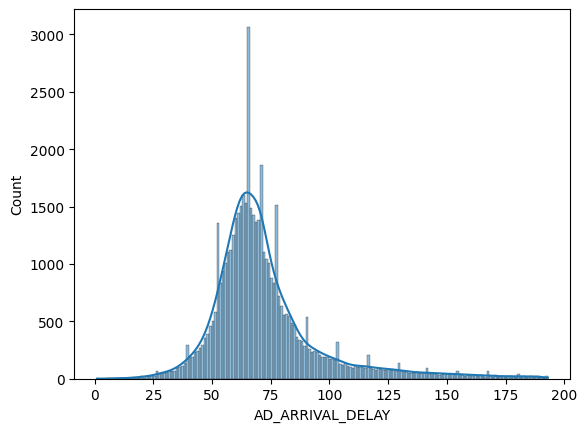

In [ ]:
sns.histplot(data=ra_df, x='AD_ARRIVAL_DELAY', kde = True)

In [ ]:
#Scaling the data
sc=StandardScaler()
XRA_scaled=sc.fit_transform(ra_X)
XRA_scaled=pd.DataFrame(XRA_scaled, columns=ra_X.columns)

In [ ]:
XRA_train, XRA_test, yra_train, yra_test = train_test_split(ra_X, ra_Y, test_size=0.2, random_state=1)
XRA_train, XRA_val, yra_train, yra_val = train_test_split(XRA_train, yra_train, test_size=0.25, random_state=1)

In [ ]:
print(XRA_train.shape)
print(yra_train.shape)
print(XRA_test.shape)
print(yra_test.shape)
print(XRA_val.shape)
print(yra_val.shape)
XRA_train.to_csv('/content/drive/MyDrive/Flights/Dataframes/XRA_train.csv')
pd.DataFrame(yra_train).to_csv('/content/drive/MyDrive/Flights/Dataframes/yra_train.csv')
XRA_test.to_csv('/content/drive/MyDrive/Flights/Dataframes/XRA_test.csv')
pd.DataFrame(yra_test).to_csv('/content/drive/MyDrive/Flights/Dataframes/yra_test.csv')
XRA_val.to_csv('/content/drive/MyDrive/Flights/Dataframes/XRA_val.csv')
pd.DataFrame(yra_val).to_csv('/content/drive/MyDrive/Flights/Dataframes/yra_val.csv')

(30037, 15)
(30037, 1)
(10013, 15)
(10013, 1)
(10013, 15)
(10013, 1)


After partitioning the data into training, testing, and validation sets, we upload the datasets in .csv format to Drive which allows easy access to the dataframes for use in other codes.

# 6.1 Delayed vs. Cancelled (Multiclass Classification) Model Training

Downloading test, train and validation datasets

In [ ]:
XMC_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XMC_train.csv")
ymc_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/ymc_train.csv")
XMC_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XMC_test.csv")
ymc_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/ymc_test.csv")
XMC_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XMC_val.csv")
ymc_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/ymc_val.csv")

 Dropping the index column

In [ ]:
XMC_train=XMC_Original_train.drop('Unnamed: 0', axis=1)
ymc_train=ymc_Original_train.drop('Unnamed: 0', axis=1)
XMC_test=XMC_Original_test.drop('Unnamed: 0', axis=1)
ymc_test=ymc_Original_test.drop('Unnamed: 0', axis=1)
XMC_val=XMC_Original_val.drop('Unnamed: 0', axis=1)
ymc_val=ymc_Original_val.drop('Unnamed: 0', axis=1)

In [ ]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

LR: 99.2675799566612 (0.26041026083847707)
KNN: 97.48976389788639 (0.21536102392527073)
NB: 97.622928558348 (0.34090099899549425)


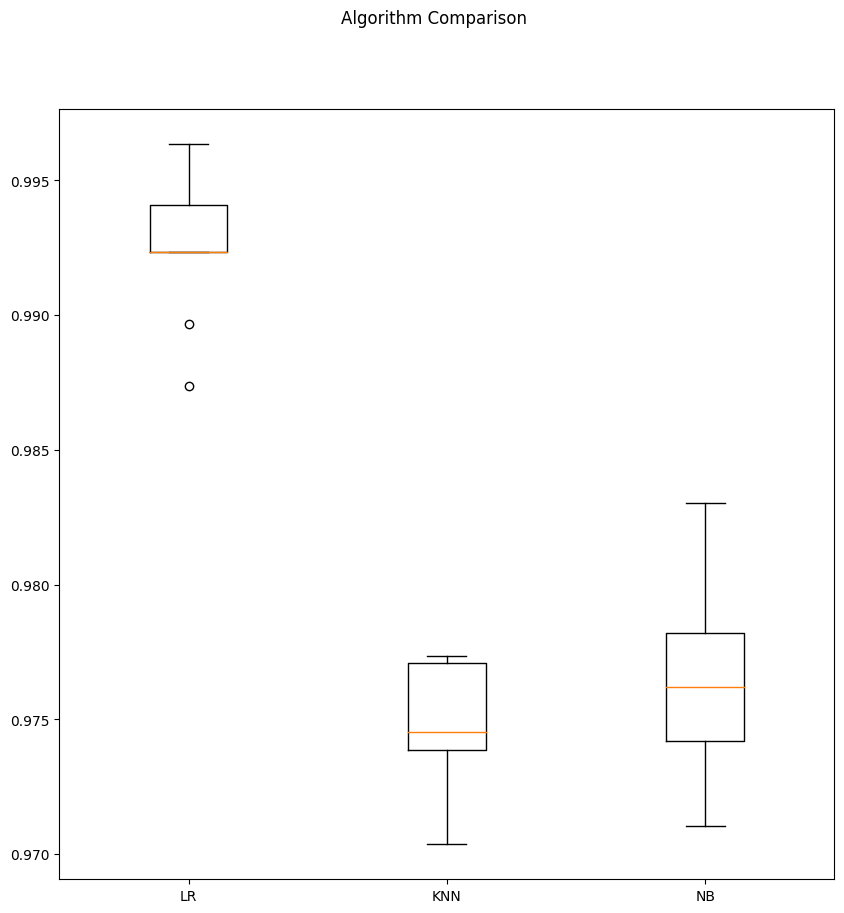

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

def eval_algorithms(models, show_boxplots=True):
    # Evaluate each model in turn
    # Setup the test harness to use 10-fold cross validation
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, XMC_train, ymc_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("Estimated accuracy of {} with the mean of {} and std. dev. {}".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
        print("{}: {} ({})".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))

    if show_boxplots:
        # Create a plot of the model evaluation results to compae the spread
        # and the estimated mean accuracy of each model
        fig = plt.figure(figsize=(10,10))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

eval_algorithms(models)

- Logistic Regression has the highest average cross-validation score, indicating that it performs the best on average across different folds of the dataset.
- KNN has a slightly lower average cross-validation score than Logistic Regression, but its standard deviation is also lower, indicating more consistency in performance across folds.
- Naive Bayes has a similar average cross-validation score to KNN but a higher standard deviation, suggesting more variability in performance across folds.

Based solely on cross-validation scores, Logistic Regression seems to be the best-performing model for this particular dataset. However, it's essential to consider other factors such as model interpretability, computational efficiency, and the specific requirements of the problem before making a final decision.

Additionally, it's worth noting that the differences in average cross-validation scores between the models are relatively small. Therefore, it might be beneficial to conduct further evaluation, such as on a holdout test set or using additional performance metrics, to make a more informed decision.

              precision    recall  f1-score   support

           C       1.00      1.00      1.00        99
           D       0.94      0.95      0.94      1789
           N       0.99      0.99      0.99      8125

    accuracy                           0.98     10013
   macro avg       0.97      0.98      0.98     10013
weighted avg       0.98      0.98      0.98     10013



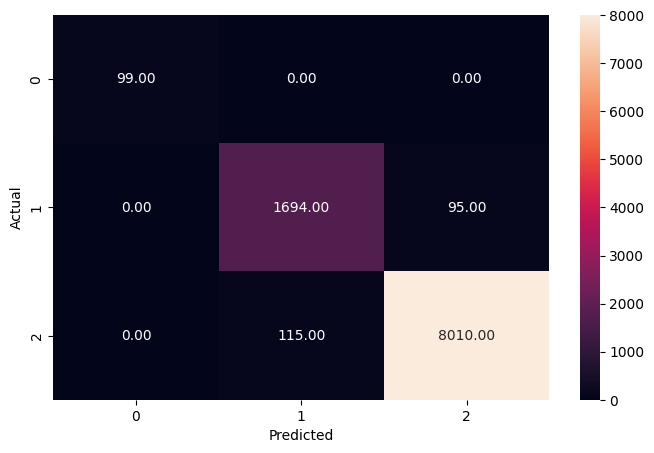

In [ ]:
lg = LogisticRegression()
lg.fit(XMC_train, ymc_train)

# making predictions on the testing set
y_pred = lg.predict(XMC_test)
metrics_score(ymc_test,y_pred)

**Observations**
 * For the test set the model achieved high precision, recall, and F1-score for each class, indicating strong predictive capability.

 * For class 'C'(Cancelled), the precision, recall, and F1-score are all perfect at 1.00, suggesting the model correctly identified all instances of this class without any false positives or negatives.

 * Class 'D'(Delayed) exhibits slightly lower scores but remains robust with precision of 0.94, recall of 0.95, and an F1-score of 0.94. This indicates that while the model accurately classified a majority of instances belonging to class 'D', there were some instances where it misclassified.

 * The largest class, 'N'(Not delayed), demonstrates exceptional performance with precision, recall, and F1-score all at 0.99. This indicates the model's ability to effectively identify instances of class 'N' with high precision and recall.

 * Overall, the model achieved an accuracy of 0.98, indicating it correctly classified 98% of instances across all classes.

              precision    recall  f1-score   support

           C       1.00      1.00      1.00        81
           D       0.95      0.96      0.95      1796
           N       0.99      0.99      0.99      8136

    accuracy                           0.98     10013
   macro avg       0.98      0.98      0.98     10013
weighted avg       0.98      0.98      0.98     10013



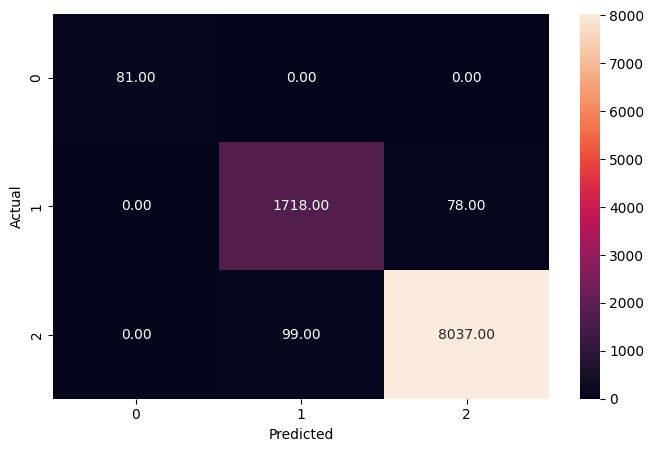

In [ ]:
#Making predictions on the validation set.
y_pred = lg.predict(XMC_val)
metrics_score(ymc_val,y_pred)

**Observations**
* For class 'C'(Cancelled), the precision, recall, and F1-score are all perfect at 1.00, indicating the model's flawless identification of instances belonging to this class.

* In class 'D'(Delayed), the model achieved a high precision of 0.95, suggesting that the majority of instances classified as 'D' were indeed correct. The recall, which measures the model's ability to capture all instances of 'D' in the dataset, stands at 0.96, indicating a strong performance. The F1-score, which balances precision and recall, is 0.95, reflecting the model's overall effectiveness in classifying class 'D' instances.

* Similarly, for the largest class 'N'(Not delayed), the model exhibits exceptional precision, recall, and F1-score, all at 0.99, signifying high accuracy in classifying instances of 'N'.

* On the validation set, the overall accuracy of the model is reported at 0.98, suggesting that it correctly classified 98% of instances across all classes.

              precision    recall  f1-score   support

           C       1.00      1.00      1.00        99
           D       0.94      0.95      0.94      1789
           N       0.99      0.99      0.99      8125

    accuracy                           0.98     10013
   macro avg       0.97      0.98      0.98     10013
weighted avg       0.98      0.98      0.98     10013



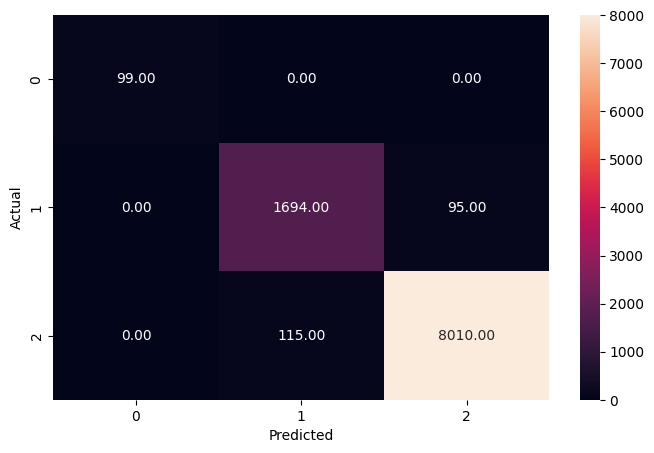

In [ ]:
#Making predictions on the Test set.
y_pred = lg.predict(XMC_test)
metrics_score(ymc_test,y_pred)

# 6.2 Reason for Flight Delay (Multilabel Classification) Model Training

In [ ]:
XML_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XML_train.csv")
yml_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yml_train.csv")
XML_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XML_test.csv")
yml_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yml_test.csv")
XML_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XML_val.csv")
yml_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yml_val.csv")

In [ ]:
XML_train=XML_Original_train.drop('Unnamed: 0', axis=1)
yml_train=yml_Original_train.drop('Unnamed: 0', axis=1)
XML_test=XML_Original_test.drop('Unnamed: 0', axis=1)
yml_test=yml_Original_test.drop('Unnamed: 0', axis=1)
XML_val=XML_Original_val.drop('Unnamed: 0', axis=1)
yml_val=yml_Original_val.drop('Unnamed: 0', axis=1)

In [ ]:
yml_train.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


0,1,2,3 and 4 in the yml_train dataset denotes the following
* 0-AIR_SYSTEM_DELAY
* 1-SECURITY_DELAY
* 2-AIRLINE_DELAY
* 3-LATE_AIRCRAFT_DELAY
* 4-WEATHER_DELAY

In [ ]:
clf = MultiOutputClassifier(LogisticRegression()).fit(XML_train, yml_train)
y_pred = clf.predict(XML_test)
print('Accuracy Score: ', accuracy_score(yml_test, y_pred))
print('Hamming Loss: ', round(hamming_loss(yml_test, y_pred),2))
cm = multilabel_confusion_matrix(yml_test, y_pred)
print(cm)
y_pred = clf.predict(XML_val)
print('Accuracy Score: ', accuracy_score(yml_val, y_pred))
print('Hamming Loss: ', round(hamming_loss(yml_val, y_pred),2))

Accuracy Score:  0.8273244781783681
Hamming Loss:  0.05
[[[9025  187]
  [ 556  245]]

 [[9997    0]
  [  16    0]]

 [[9176  188]
  [ 552   97]]

 [[8954  239]
  [ 606  214]]

 [[9683   30]
  [ 294    6]]]
Accuracy Score:  0.8280235693598322
Hamming Loss:  0.05


**Observations**

The Logistic Regression model has an accuracy score of 0.8273244781783681 and
Hamming Loss of 0.05 on the test data where as it has an Accuracy Score:  0.8280235693598322 and Hamming Loss of 0.05 on the validation data . The accuracy score measures the proportion of correctly classified instances, while the Hamming loss measures the fraction of labels that are incorrectly predicted.

In [ ]:
clf = MultiOutputClassifier(GaussianNB()).fit(XML_train, yml_train)
y_pred = clf.predict(XML_test)
print('Accuracy Score: ', accuracy_score(yml_test, y_pred))
print('Hamming Loss: ', round(hamming_loss(yml_test, y_pred),2))
cm = multilabel_confusion_matrix(yml_test, y_pred)
print(cm)
y_pred = clf.predict(XML_val)
print('Accuracy Score: ', accuracy_score(yml_val, y_pred))
print('Hamming Loss: ', round(hamming_loss(yml_val, y_pred),2))

Accuracy Score:  0.8017577149705383
Hamming Loss:  0.08
[[[8632  580]
  [ 364  437]]

 [[9649  348]
  [  13    3]]

 [[8890  474]
  [ 454  195]]

 [[8577  616]
  [ 214  606]]

 [[9194  519]
  [ 231   69]]]
Accuracy Score:  0.8007590132827325
Hamming Loss:  0.08


**Observations**

The GaussianNB model has an accuracy score of 0.8017577149705383 and
Hamming Loss of 0.08 on the test data where as it has an Accuracy Score of  0.8007590132827325 and
Hamming Loss of  0.08 on the validation data . The accuracy score measures the proportion of correctly classified instances, while the Hamming loss measures the fraction of labels that are incorrectly predicted.

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(XML_train, yml_train)
y_pred = knn_classifier.predict(XML_test)

print('Accuracy Score: ', accuracy_score(yml_test, y_pred))
print('Hamming Loss: ', round(hamming_loss(yml_test, y_pred),2))
cm = multilabel_confusion_matrix(yml_test, y_pred)
print(cm)
y_pred = clf.predict(XML_val)
print('Accuracy Score: ', accuracy_score(yml_val, y_pred))
print('Hamming Loss: ', round(hamming_loss(yml_val, y_pred),2))

Accuracy Score:  0.8561869569559573
Hamming Loss:  0.05
[[[8947  265]
  [ 442  359]]

 [[9997    0]
  [  16    0]]

 [[9156  208]
  [ 482  167]]

 [[8918  275]
  [ 355  465]]

 [[9666   47]
  [ 261   39]]]
Accuracy Score:  0.8007590132827325
Hamming Loss:  0.08


**Observations**

The knn_classifier model has an accuracy score of 0.8561869569559573 and
Hamming Loss of  0.05 on the test data where as it has an Accuracy Score of 0.8007590132827325 and Hamming Loss of 0.08 on the validation data . The accuracy score measures the proportion of correctly classified instances, while the Hamming loss measures the fraction of labels that are incorrectly predicted.

# 6.3 Flight Delay Prediction in Minutes (Regression Analysis) Model Training


Downloading the dataframes

In [ ]:
XRA_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XRA_train.csv")
yra_Original_train = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yra_train.csv")
XRA_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XRA_test.csv")
yra_Original_test = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yra_test.csv")
XRA_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/XRA_val.csv")
yra_Original_val = pd.read_csv("/content/drive/MyDrive/Flights/Dataframes/yra_val.csv")

Dropping the index column

In [ ]:
XRA_train=XRA_Original_train.drop('Unnamed: 0', axis=1)
yra_train=yra_Original_train.drop('Unnamed: 0', axis=1)
XRA_test=XRA_Original_test.drop('Unnamed: 0', axis=1)
yra_test=yra_Original_test.drop('Unnamed: 0', axis=1)
XRA_val=XRA_Original_val.drop('Unnamed: 0', axis=1)
yra_val=yra_Original_val.drop('Unnamed: 0', axis=1)

Calculating VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns
    train.dropna(inplace=True)

    # Convert non-numeric values to numeric
    train = train.apply(pd.to_numeric, errors='coerce')
    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(train.shape[1])
    ]
    return vif


print(checking_vif(XRA_train))

                    feature       VIF
0                     MONTH  1.009824
1                       DAY  1.000429
2               DAY_OF_WEEK  1.000952
3       SCHEDULED_DEPARTURE  1.018023
4                  AIR_TIME  1.830336
5            Origin_Midwest       inf
6          Origin_Northeast       inf
7              Origin_South       inf
8        Origin_Territories       inf
9               Origin_West       inf
10      Destination_Midwest       inf
11    Destination_Northeast       inf
12        Destination_South       inf
13  Destination_Territories       inf
14         Destination_West       inf


**Observations**

The presence of dummy variables without removing one reference category per categorical feature has led to multicollinearity issues, resulting in VIF values reaching infinity for 10 columns.

In [ ]:
model1 = sm.OLS(yra_train,XRA_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:       AD_ARRIVAL_DELAY   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     80.03
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          2.03e-210
Time:                        04:32:51   Log-Likelihood:            -1.3775e+05
No. Observations:               30037   AIC:                         2.755e+05
Df Residuals:                   30023   BIC:                         2.757e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
MONTH                     

**Observations**

* The R-squared value of 0.033 suggests that only approximately 3.3% of the variability in AD_ARRIVAL_DELAY is explained by the independent variables.
* The F-statistic of 80.03 with a very low p-value indicates that the overall regression model is statistically significant.

 Dropping one dummy variable per category

In [ ]:
XRA_train = XRA_train.drop(["Origin_Midwest", "Destination_Midwest"], axis=1)
print(checking_vif(XRA_train))

                    feature        VIF
0                     MONTH   4.452272
1                       DAY   4.084874
2               DAY_OF_WEEK   4.719338
3       SCHEDULED_DEPARTURE   8.849971
4                  AIR_TIME   5.370261
5          Origin_Northeast   2.939010
6              Origin_South   5.588936
7        Origin_Territories   1.056093
8               Origin_West  16.434890
9     Destination_Northeast   5.740304
10        Destination_South   6.267742
11  Destination_Territories   1.049427
12         Destination_West  14.836603


Dropping all he features that has a VIF value higher than 5 since it indicateshigh multicollinearity among predictors.

In [ ]:
XRA_train = XRA_train.drop(["Origin_West", "Origin_South", "Destination_Northeast", "Destination_South", "Destination_West", "SCHEDULED_DEPARTURE", "AIR_TIME"], axis=1)
print(checking_vif(XRA_train))

                   feature       VIF
0                    MONTH  3.195096
1                      DAY  3.077228
2              DAY_OF_WEEK  3.234348
3         Origin_Northeast  1.073605
4       Origin_Territories  1.005565
5  Destination_Territories  1.004400


In [ ]:
model2 = sm.OLS(yra_train,XRA_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:       AD_ARRIVAL_DELAY   R-squared (uncentered):                   0.824
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                          2.337e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):                        0.00
Time:                        04:33:00   Log-Likelihood:                     -1.4692e+05
No. Observations:               30037   AIC:                                  2.938e+05
Df Residuals:                   30031   BIC:                                  2.939e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

**Observations**

* The R-squared value of 0.824 indicates that approximately 82.4% of the variability in AD_ARRIVAL_DELAY is explained by the independent variables.
* The F-statistic of 2.337e+04 with a p-value of 0.00 suggests that the overall regression model is highly significant.

<Axes: ylabel='Count'>

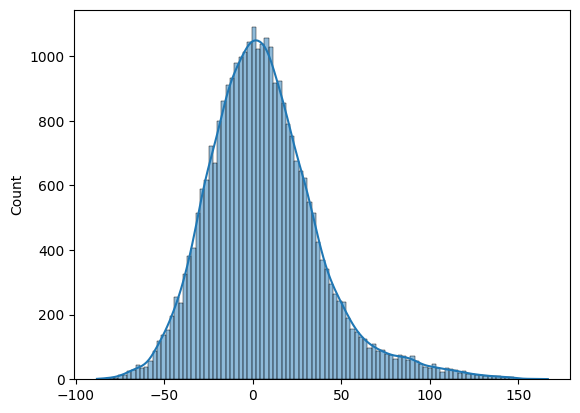

In [ ]:
residuals = model2.resid
sns.histplot(residuals, kde=True)

In [ ]:
XRA_test = XRA_test.drop(["Origin_Midwest", "Destination_Midwest", "Origin_West", "Origin_South", "Destination_Northeast", "Destination_South", "Destination_West", "SCHEDULED_DEPARTURE", "AIR_TIME"], axis=1)
XRA_val = XRA_val.drop(["Origin_Midwest", "Destination_Midwest", "Origin_West", "Origin_South", "Destination_Northeast", "Destination_South", "Destination_West", "SCHEDULED_DEPARTURE", "AIR_TIME"], axis=1)

In [ ]:
# Prediction on Train data
y_pred_train = model2.predict(XRA_train)
y_observed_train = yra_train

# Prediction on Validation data
y_pred_val = model2.predict(XRA_val)
y_observed_val = yra_val

# Prediction on test data
y_pred_test = model2.predict(XRA_test)
y_observed_test = yra_test

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Calculate Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [ ]:
print(
    pd.DataFrame(
        {
            "Data": ["Train", "Val", "Test"],
            "RMSE": [
                rmse(y_pred_train, y_observed_train),
                rmse(y_pred_val, y_observed_val),
                rmse(y_pred_test, y_observed_test),
            ],
            "MAE": [
                mae(y_pred_train, y_observed_train),
                mae(y_pred_val, y_observed_val),
                mae(y_pred_test, y_observed_test),
            ],
            "MAPE": [
                mape(y_pred_train, y_observed_train),
                mape(y_pred_val, y_observed_val),
                mape(y_pred_test, y_observed_test),
            ],
        }
    )
)

    Data       RMSE        MAE      MAPE
0  Train  32.210859  24.042234  0.444889
1    Val  32.409667  24.199183  0.449289
2   Test  32.224404  24.060442  0.441072


Based on these observations:

- The model performs consistently across different datasets (training, validation, and test) based on RMSE, MAE, and MAPE metrics.
- The RMSE and MAE values suggest that the model's predictions are, on average, around 32 units away from the true values.
- The MAPE values indicate that the model's predictions have a very low average percentage difference from the true values, suggesting good accuracy.

Overall, the model appears to be performing well and generalizing effectively to unseen data, as indicated by the consistent performance across different datasets and the low MAPE values. However, further analysis and comparison with alternative models may be needed to make a definitive conclusion about the model's performance.